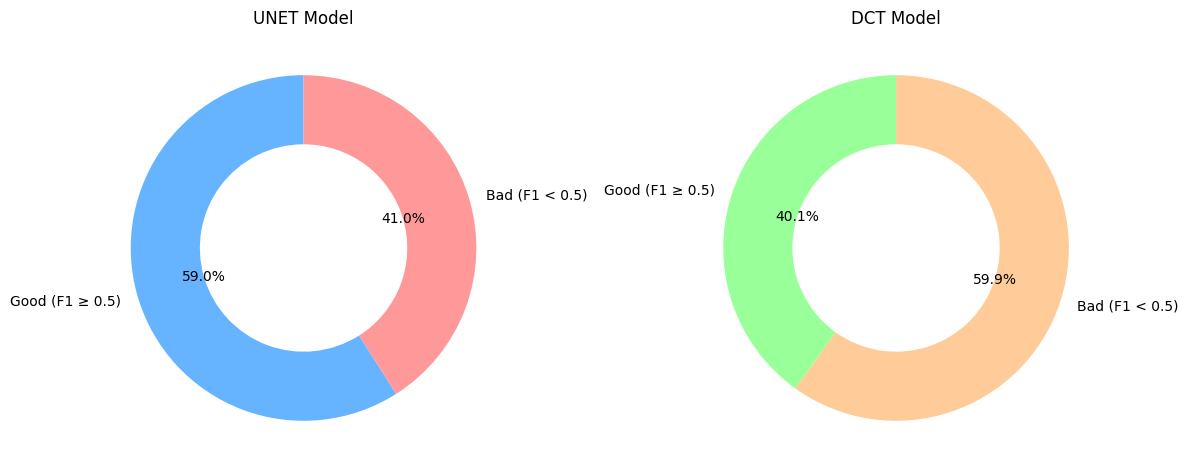

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load UNET and DCT summary files
df_unet = pd.read_csv("../Results/UNET/Summary-UNET.csv")
df_dct = pd.read_csv("../Results/DCT/Summary-DCT.csv")

# Function to count good and bad images
def count_good_bad(df):
    good_count = df[df['F1-Score'] >= 0.5].shape[0]
    bad_count = df[df['F1-Score'] < 0.5].shape[0]
    return good_count, bad_count

unet_good, unet_bad = count_good_bad(df_unet)
dct_good, dct_bad = count_good_bad(df_dct)

# Plotting both donut charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# UNET donut chart
axes[0].pie([unet_good, unet_bad],
            labels=['Good (F1 ≥ 0.5)', 'Bad (F1 < 0.5)'],
            colors=['#66B3FF', '#FF9999'],
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'width': 0.4})
axes[0].set_title('UNET Model')

# DCT donut chart
axes[1].pie([dct_good, dct_bad],
            labels=['Good (F1 ≥ 0.5)', 'Bad (F1 < 0.5)'],
            colors=['#99FF99', '#FFCC99'],
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'width': 0.4})
axes[1].set_title('DCT Model')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

def calculate_average_percentages(summary_path, model_name, only_good_images="NO"):
    print(f"\n📊 Processing {model_name} Summary")

    # Load the summary file
    df = pd.read_csv(summary_path)

    # Filter based on toggle
    if only_good_images.upper() == "YES":
        df_selected = df[df['F1-Score'] >= 0.5].copy()
        print("✅ Working on good images (F1-Score >= 0.5)")
    else:
        df_selected = df.copy()
        print("✅ Working on all images")

    # Calculate total pixels per image
    df_selected['Total'] = df_selected['TP'] + df_selected['TN'] + df_selected['FP'] + df_selected['FN']

    # Calculate percentages per image
    df_selected['TP%'] = (df_selected['TP'] / df_selected['Total']) * 100
    df_selected['TN%'] = (df_selected['TN'] / df_selected['Total']) * 100
    df_selected['FP%'] = (df_selected['FP'] / df_selected['Total']) * 100
    df_selected['FN%'] = (df_selected['FN'] / df_selected['Total']) * 100

    # Print average percentages
    print(f"\nAverage Percentages Across Selected {model_name} Images:")
    print(f"TP%: {df_selected['TP%'].mean():.2f}%")
    print(f"TN%: {df_selected['TN%'].mean():.2f}%")
    print(f"FP%: {df_selected['FP%'].mean():.2f}%")
    print(f"FN%: {df_selected['FN%'].mean():.2f}%")

# Configuration toggle
only_good_images = "NO"  # Change to "YES" if needed

# Paths for both summaries
dct_summary_path = '../Results/DCT/Summary-DCT.csv'
unet_summary_path = '../Results/UNET/Summary-UNET.csv'

# Process both models
calculate_average_percentages(dct_summary_path, model_name="DCT", only_good_images=only_good_images)
calculate_average_percentages(unet_summary_path, model_name="UNET", only_good_images=only_good_images)


📊 Processing DCT Summary
✅ Working on all images

Average Percentages Across Selected DCT Images:
TP%: 2.69%
TN%: 88.42%
FP%: 6.01%
FN%: 2.89%

📊 Processing UNET Summary
✅ Working on all images

Average Percentages Across Selected UNET Images:
TP%: 2.96%
TN%: 94.22%
FP%: 0.18%
FN%: 2.64%


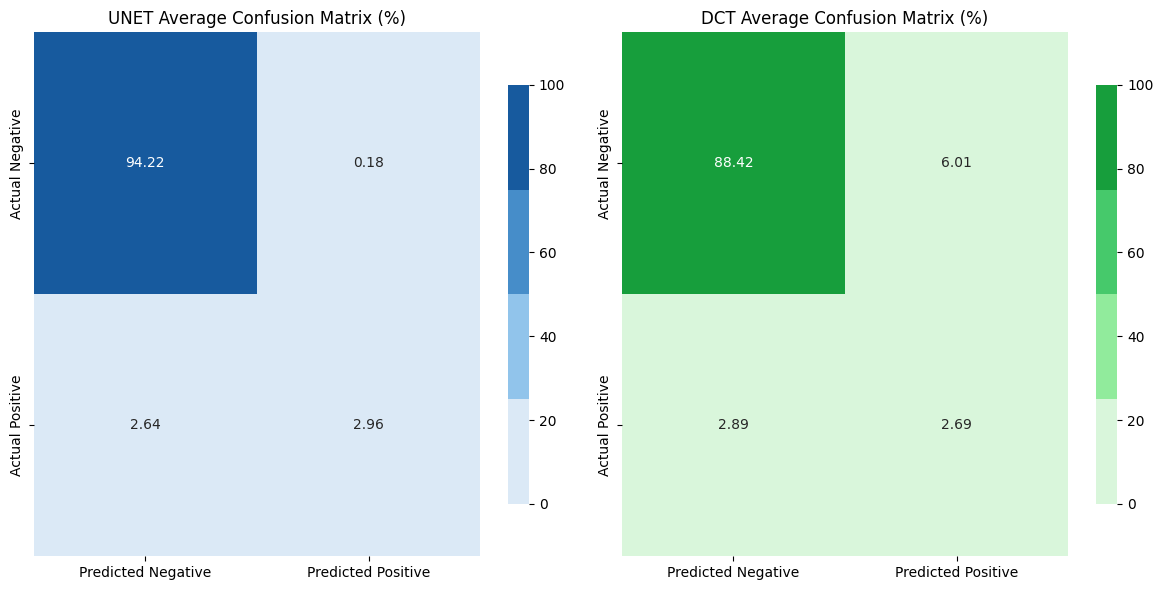

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Custom 4-shade blue and green colormaps
custom_blues = ListedColormap(["#dbe9f6", "#91c4eb", "#468dc9", "#175a9e"])
custom_greens = ListedColormap(["#d9f6db", "#91eb9c", "#46c96b", "#179e3c"])

def get_avg_confusion_percentages(summary_path, model_name, only_good_images="NO"):
    df = pd.read_csv(summary_path)

    if only_good_images.upper() == "YES":
        df_selected = df[df['F1-Score'] >= 0.5].copy()
    else:
        df_selected = df.copy()

    df_selected['Total'] = df_selected['TP'] + df_selected['TN'] + df_selected['FP'] + df_selected['FN']

    tp_percent = (df_selected['TP'] / df_selected['Total'] * 100).mean()
    tn_percent = (df_selected['TN'] / df_selected['Total'] * 100).mean()
    fp_percent = (df_selected['FP'] / df_selected['Total'] * 100).mean()
    fn_percent = (df_selected['FN'] / df_selected['Total'] * 100).mean()

    return tp_percent, tn_percent, fp_percent, fn_percent

def plot_confusion_matrices_percentage(unet_percents, dct_percents):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    unet_cm = pd.DataFrame([[unet_percents[1], unet_percents[2]],
                            [unet_percents[3], unet_percents[0]]],
                           index=["Actual Negative", "Actual Positive"],
                           columns=["Predicted Negative", "Predicted Positive"])

    dct_cm = pd.DataFrame([[dct_percents[1], dct_percents[2]],
                           [dct_percents[3], dct_percents[0]]],
                          index=["Actual Negative", "Actual Positive"],
                          columns=["Predicted Negative", "Predicted Positive"])

    # Plot UNET matrix
    sns.heatmap(unet_cm, annot=True, fmt=".2f", cmap=custom_blues, vmin=0, vmax=100,
                ax=axes[0], cbar_kws={"shrink": 0.8})
    axes[0].set_title("UNET Average Confusion Matrix (%)")

    # Plot DCT matrix
    sns.heatmap(dct_cm, annot=True, fmt=".2f", cmap=custom_greens, vmin=0, vmax=100,
                ax=axes[1], cbar_kws={"shrink": 0.8})
    axes[1].set_title("DCT Average Confusion Matrix (%)")

    plt.tight_layout()
    plt.show()

# Configuration toggle
only_good_images = "NO"

# File paths
dct_summary_path = '../Results/DCT/Summary-DCT.csv'
unet_summary_path = '../Results/UNET/Summary-UNET.csv'

# Calculate percentages
dct_percents = get_avg_confusion_percentages(dct_summary_path, "DCT", only_good_images)
unet_percents = get_avg_confusion_percentages(unet_summary_path, "UNET", only_good_images)

# Plot
plot_confusion_matrices_percentage(unet_percents, dct_percents)

In [ ]:
import pandas as pd

# Load summary files
df_unet = pd.read_csv("../Results/UNET/Summary-UNET.csv")
df_dct = pd.read_csv("../Results/DCT/Summary-DCT.csv")

# Function to filter good list and calculate averages
def calculate_avg_metrics(df):
    good_df = df[df['F1-Score'] >= 0.5]
    avg_precision = good_df['Precision'].mean()
    avg_recall = good_df['Recall'].mean()
    avg_iou = good_df['IoU'].mean()
    return round(avg_precision, 4), round(avg_recall, 4), round(avg_iou, 4)

# UNET averages and DCT averages
unet_avg_precision, unet_avg_recall, unet_avg_iou = calculate_avg_metrics(df_unet)
dct_avg_precision, dct_avg_recall, dct_avg_iou = calculate_avg_metrics(df_dct)

# Print results
print("✅ UNET Model (Good List Averages):"); print(f"Precision: {unet_avg_precision}") ;print(f"Recall: {unet_avg_recall}"); print(f"IoU: {unet_avg_iou}\n")
print("✅ DCT Model (Good List Averages):") ; print(f"Precision: {dct_avg_precision}") ;print(f"Recall: {dct_avg_recall}") ; print(f"IoU: {dct_avg_iou}")

✅ UNET Model (Good List Averages):
Precision: 0.9604
Recall: 0.858
IoU: 0.8314

✅ DCT Model (Good List Averages):
Precision: 0.8949
Recall: 0.7167
IoU: 0.647


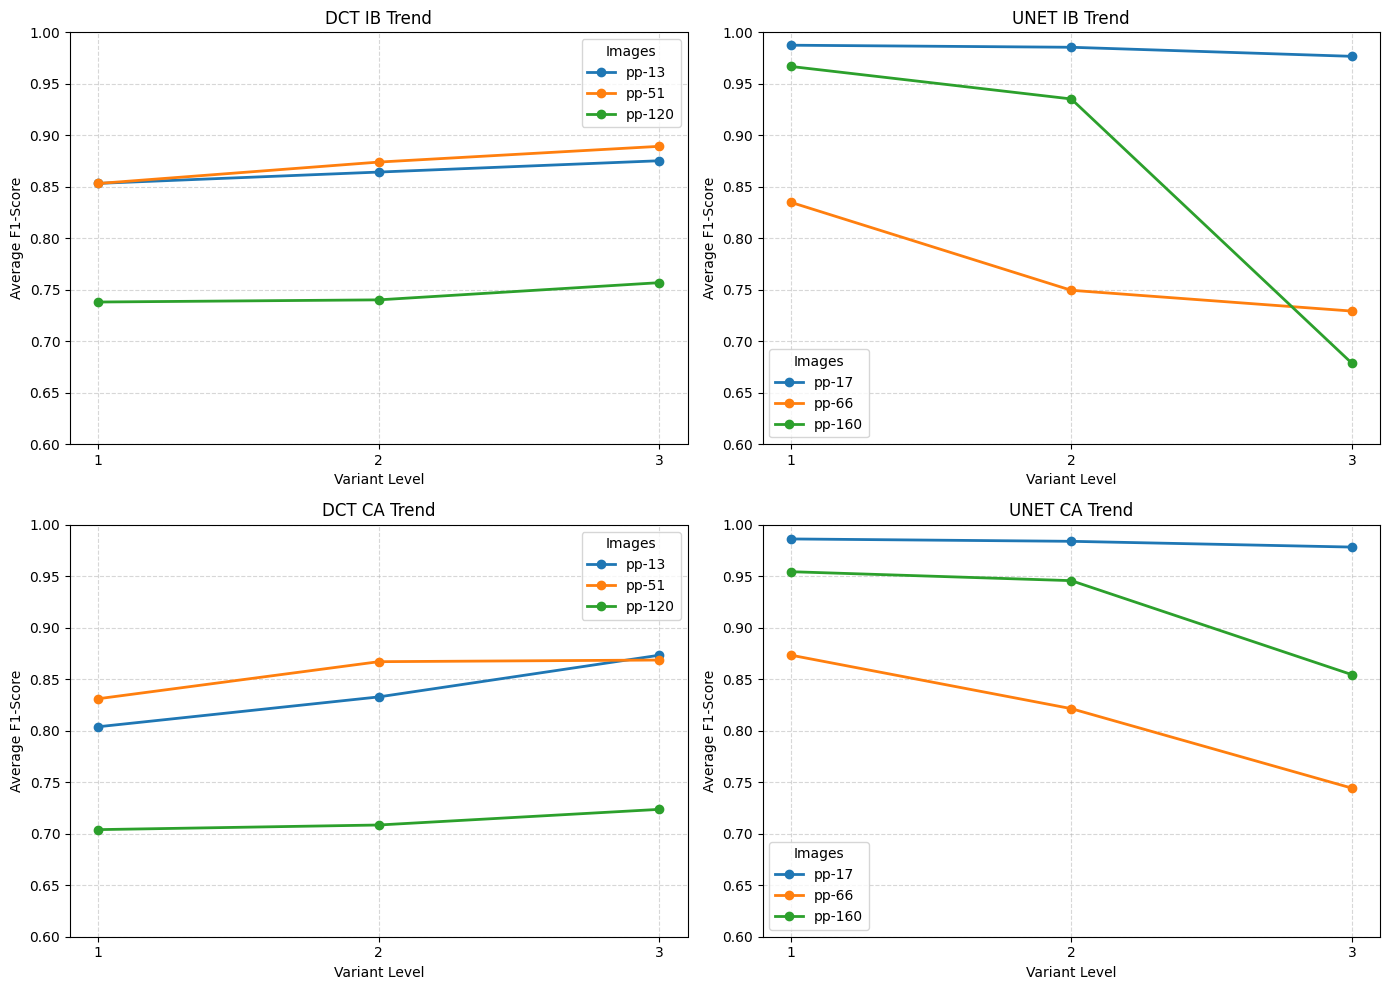

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for DCT and UNET
dct_files = {
    "pp-13": "../Results/DCT/pp-13.csv",
    "pp-51": "../Results/DCT/pp-51.csv",
    "pp-120": "../Results/DCT/pp-120.csv"
}

unet_files = {
    "pp-17": "../Results/UNET/pp-17.csv",
    "pp-66": "../Results/UNET/pp-66.csv",
    "pp-160": "../Results/UNET/pp-160.csv"
}

def get_variant_f1_trends(file_paths, variant_prefix):
    """
    For each file, get F1-Scores for each variant level (e.g., IB1, IB2, IB3 or CA1, CA2, CA3)
    Returns a dictionary: {filename: [F1 for level 1, level 2, level 3]}
    """
    trends = {}

    for file_key, path in file_paths.items():
        df = pd.read_csv(path)
        f1_scores = []
        for level in [1, 2, 3]:
            variant_name = f"{variant_prefix}{level}"
            subset = df[df['Image Name'].str.contains(variant_name)]
            avg_f1 = subset['F1-Score'].mean()
            f1_scores.append(round(avg_f1, 4))
        trends[file_key] = f1_scores

    return trends

# Get trends
dct_ib_trends = get_variant_f1_trends(dct_files, "IB")
dct_ca_trends = get_variant_f1_trends(dct_files, "CA")
unet_ib_trends = get_variant_f1_trends(unet_files, "IB")
unet_ca_trends = get_variant_f1_trends(unet_files, "CA")

# Plotting setup
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

variant_levels = ["1", "2", "3"]  # IB1, IB2, IB3 or CA1, CA2, CA3

def plot_trend(ax, trend_data, title, color):
    for image_name, f1_values in trend_data.items():
        ax.plot(variant_levels, f1_values, marker='o', label=image_name, linewidth=2)

    ax.set_title(title)
    ax.set_ylim(0.6, 1.0)
    ax.set_xlabel("Variant Level")
    ax.set_ylabel("Average F1-Score")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(title="Images")

# Row 1: IB Trends
plot_trend(axes[0, 0], dct_ib_trends, "DCT IB Trend", color="#468dc9")
plot_trend(axes[0, 1], unet_ib_trends, "UNET IB Trend", color="#468dc9")

# Row 2: CA Trends
plot_trend(axes[1, 0], dct_ca_trends, "DCT CA Trend", color="#46c96b")
plot_trend(axes[1, 1], unet_ca_trends, "UNET CA Trend", color="#46c96b")

plt.tight_layout()
plt.show()


✅ Using all images — 197 images
✅ Using all images — 200 images


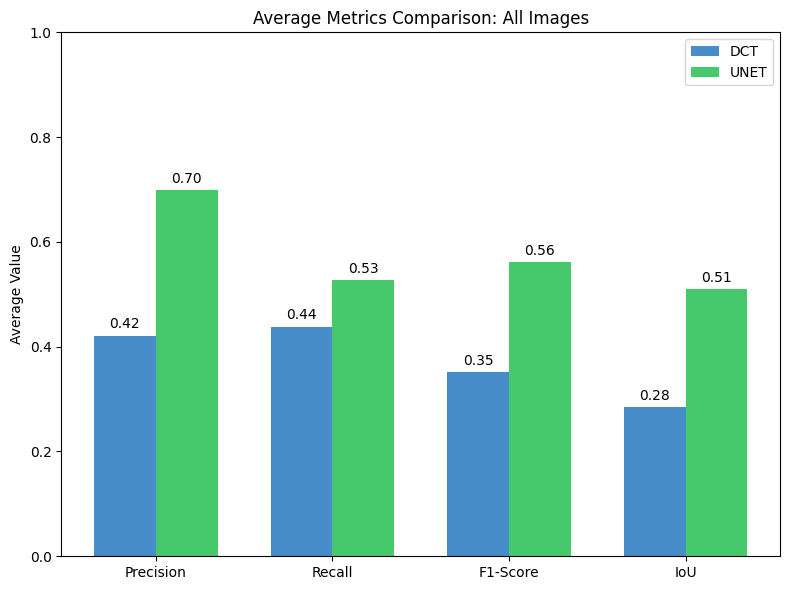

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_avg_metrics(summary_path, only_good_images="YES"):
    df = pd.read_csv(summary_path)

    if only_good_images.upper() == "YES":
        df = df[df['F1-Score'] >= 0.5].copy()
        print(f"✅ Using good list (F1-Score ≥ 0.5) — {len(df)} images selected")
    else:
        print(f"✅ Using all images — {len(df)} images")

    avg_precision = df['Precision'].mean()
    avg_recall = df['Recall'].mean()
    avg_f1 = df['F1-Score'].mean()
    avg_iou = df['IoU'].mean()

    return [avg_precision, avg_recall, avg_f1, avg_iou]

# Configuration toggle
only_good_images = "NO"  # Change to "NO" for all images

# Paths
dct_summary_path = '../Results/DCT/Summary-DCT.csv'
unet_summary_path = '../Results/UNET/Summary-UNET.csv'

# Get averages
dct_metrics = get_avg_metrics(dct_summary_path, only_good_images=only_good_images)
unet_metrics = get_avg_metrics(unet_summary_path, only_good_images=only_good_images)

# Plotting
labels = ['Precision', 'Recall', 'F1-Score', 'IoU']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, dct_metrics, width, label='DCT', color='#468dc9')
bars2 = ax.bar(x + width/2, unet_metrics, width, label='UNET', color='#46c96b')

ax.set_ylabel('Average Value')
title_mode = "Good List (F1 ≥ 0.5)" if only_good_images.upper() == "YES" else "All Images"
ax.set_title(f'Average Metrics Comparison: {title_mode}')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

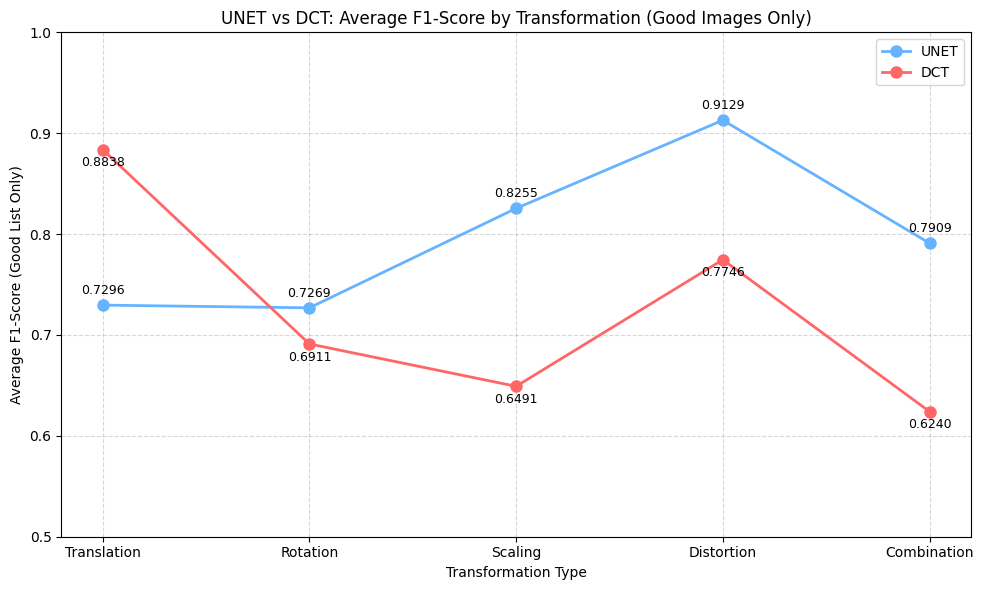

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

# Load grouped summary files for both UNET and DCT
df_unet = pd.read_csv("../Results/UNET/Grouped_HighF1_Summary.csv"); df_dct = pd.read_csv("../Results/DCT/Grouped_HighF1_Summary.csv")

transformations = df_unet['Transformation'].tolist()

# Extract Avg F1-Score values
unet_f1 = df_unet['Avg F1-Score'].values
dct_f1 = df_dct['Avg F1-Score'].values

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(transformations, unet_f1, marker='o', label='UNET', color='#66B3FF', linewidth=2, markersize=8)
plt.plot(transformations, dct_f1, marker='o', label='DCT', color='#FF6666', linewidth=2, markersize=8)

plt.xlabel("Transformation Type")
plt.ylabel("Average F1-Score (Good List Only)")
plt.title("UNET vs DCT: Average F1-Score by Transformation (Good Images Only)")
plt.ylim(0.5, 1.0)  # As per your request
plt.grid(True, linestyle='--', alpha=0.5)

# Add value labels for both lines
for i, (u_f1, d_f1) in enumerate(zip(unet_f1, dct_f1)):
    plt.annotate(f"{u_f1:.4f}", (transformations[i], u_f1), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=9)
    plt.annotate(f"{d_f1:.4f}", (transformations[i], d_f1), textcoords="offset points", xytext=(0, -12), ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

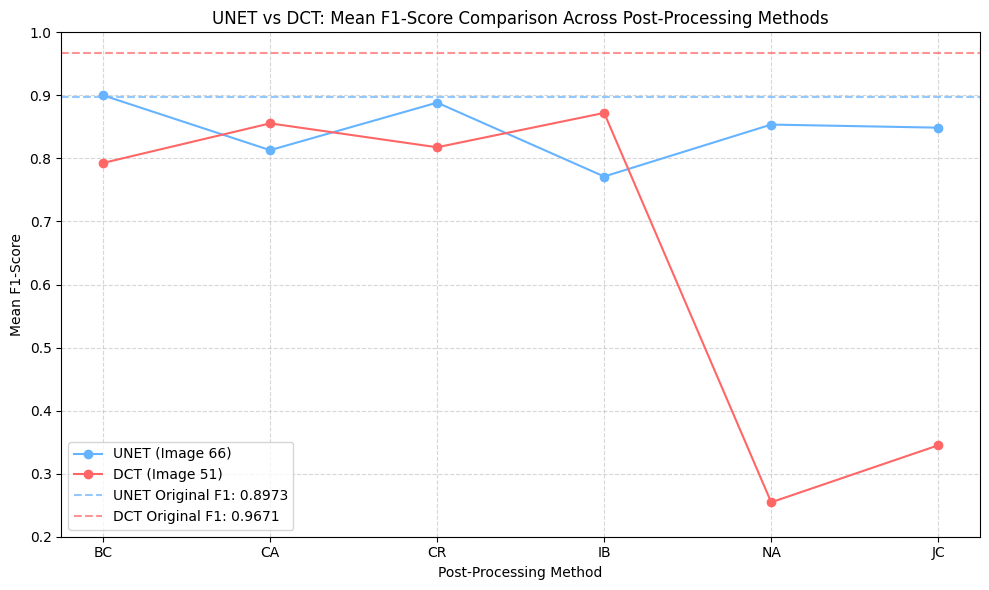

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load UNET data
df_pp66 = pd.read_csv("../Results/UNET/pp-66.csv")
df_unprocessed_unet = pd.read_csv("../Results/UNET/Summary-UNET.csv")
unet_base_image = "066_F.png"
unet_unprocessed_f1 = df_unprocessed_unet[df_unprocessed_unet['Image Name'] == unet_base_image]['F1-Score'].values[0]

# Load DCT data
df_pp51 = pd.read_csv("../Results/DCT/pp-51.csv")
df_unprocessed_dct = pd.read_csv("../Results/DCT/Summary-DCT.csv")
dct_base_image = "051_F.png"
dct_unprocessed_f1 = df_unprocessed_dct[df_unprocessed_dct['Image Name'] == dct_base_image]['F1-Score'].values[0]

# Unified post-processing categories (order fixed for both)
pp_categories = ['BC', 'CA', 'CR', 'IB', 'NA', 'JC']

# Function to calculate average F1 scores from a dataframe and pattern list
def calculate_avg_f1(df, category_order):
    avg_scores = []
    for pp_type in category_order:
        variants = [f"{pp_type}1", f"{pp_type}2", f"{pp_type}3"]
        subset = df[df['Image Name'].str.contains('|'.join(variants))]
        avg_f1 = subset['F1-Score'].mean() if not subset.empty else None
        avg_scores.append(round(avg_f1, 4) if avg_f1 is not None else None)
    return avg_scores

# Calculate for both
unet_f1_scores = calculate_avg_f1(df_pp66, pp_categories)
dct_f1_scores = calculate_avg_f1(df_pp51, pp_categories)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pp_categories, unet_f1_scores, marker='o', linestyle='-', color='#66B3FF', label='UNET (Image 66)')
plt.plot(pp_categories, dct_f1_scores, marker='o', linestyle='-', color='#FF6666', label='DCT (Image 51)')

# Reference lines for unprocessed F1
plt.axhline(y=unet_unprocessed_f1, color='#66B3FF', linestyle='--', alpha=0.7, label=f'UNET Original F1: {round(unet_unprocessed_f1, 4)}')
plt.axhline(y=dct_unprocessed_f1, color='#FF6666', linestyle='--', alpha=0.7, label=f'DCT Original F1: {round(dct_unprocessed_f1, 4)}')

plt.ylim(0.2, 1.0)
plt.xlabel('Post-Processing Method')
plt.ylabel('Mean F1-Score')
plt.title('UNET vs DCT: Mean F1-Score Comparison Across Post-Processing Methods')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()